# **DATA UNDERSTANDING**

## **CONTEXT**

Sebuah perusahaan yang memiliki berbagai departemen tersebar di beberapa negara ingin **memperluas tim-nya** di tahun mendatang. Mereka ingin tahu bagaimana mereka dapat menambah tim nya secara **efisien** dan juga dapat memperhitungkan **budget** yang diperlukan.

Perusahaan memiliki sebuah database yang berisikan data-data karyawan, termasuk gaji, lokasi, dan berbagai detail lainnya. Maka, kita akan merangkum serta menampilkan database dalam bentuk visual sehingga dapat memberikan insight terbaik sehubungan skenario di atas.

## **Database Information**

Sumber Database (HR Database): https://drive.google.com/drive/folders/1G9Q2sohMFVes7NCHaUHcuAAjlOybBYJG

Database terbagi menjadi 7 tabel, yaitu:
- employees: Menyimpan informasi utama dari seorang karyawan.
- jobs: Menyimpan informasi tentang pekerjaan.
- job_history: Menyimpan informasi tentang perubahan posisi karyawan.
- departments: Menyimpan informasi tentang departemen.
- locations: Menyimpan informasi tentang lokasi departemen.
- countries: Menyimpan informasi tentang negara dari departemen.
- regions: Menyimpan informasi tentang region departemen.

Setiap tabel yang tertera pada database dapat terhubung, baik secara langsung maupun tidak langsung, sehingga setiap informasi dari database ini akan dapat saling berkaitan. Adapun hubungan antar tabel tergambar dalam ERD pada link yang tersedia.
<br><br><br>

# **DATABASE**

## **Connecting To Database**

In [1]:
#!pip install mysql-connector-python

In [2]:
# Import Modules

import pandas as pd
import numpy as np
import mysql.connector as sqlcon

import warnings
warnings.filterwarnings('ignore')

In [3]:
# Connect To Database

mydb = sqlcon.connect(
    host = 'localhost',
    user = 'root',
    passwd = 'ivan@SQL379',
    database = 'human_resource'
)

In [4]:
# Query Function

curs = mydb.cursor()

def sql_table (query) :
    curs.execute (query)
    result = curs.fetchall()
    tabel1 = pd.DataFrame(result, columns=curs.column_names)
    return tabel1

# **SQL**

## **Data General Employee**

Data berikut merupakan data utama yang menampilkan beberapa informasi utama (diambil dari beberapa kolom dari tabel yang digabung) mengenai seorang employee secara general, dan tergabung dari 6 tabel, yaitu ```employees```, ```jobs```, ```departments```, ```locations```, ```countries```, dan ```regions```. Informasi yang diambil antara lain adalah:
- employee_id dari tabel employees
- first_name dari tabel employees
- last_name dari tabel employees
- region_name dari tabel regions
- country_name dari tabel countries
- city dari tabel locations
- department_name dari tabel departments
- job_title dari tabel jobs
- salary dari tabel employees
- commission_pct dari tabel employees
- manager_id dari tabel employees

Data disajikan dalam bentuk DataFrame.

In [5]:
table_main = sql_table(
    '''
    SELECT e.employee_id, e.first_name, e.last_name,
           reg.region_name, co.country_name, l.city,
           d.department_name, j.job_title,
           e.salary, e.commission_pct, e.manager_id
    FROM employees e
    LEFT JOIN jobs j ON e.job_id = j.job_id
    LEFT JOIN departments d ON e.department_id = d.department_id
    LEFT JOIN locations l ON d.location_id = l.location_id
    LEFT JOIN countries co ON l.country_id = co.country_id
    LEFT JOIN regions reg ON co.region_id = reg.region_id
    '''
)
table_main

,employee_id,first_name,last_name,region_name,country_name,city,department_name,job_title,salary,commission_pct,manager_id
0,100,Steven,King,Americas\r,United States of America,Seattle,Executive,President,24000.00,0.00,0
1,101,Neena,Kochhar,Americas\r,United States of America,Seattle,Executive,Administration Vice President,17000.00,0.00,100
2,102,Lex,De Haan,Americas\r,United States of America,Seattle,Executive,Administration Vice President,17000.00,0.00,100
3,103,Alexander,Hunold,Americas\r,United States of America,Southlake,IT,Programmer,9000.00,0.00,102
4,104,Bruce,Ernst,Americas\r,United States of America,Southlake,IT,Programmer,6000.00,0.00,103
...,...,...,...,...,...,...,...,...,...,...,...
102,202,Pat,Fay,Americas\r,Canada,Toronto,Marketing,Marketing Representative,6000.00,0.00,201
103,203,Susan,Mavris,Europe\r,United Kingdom,London,Human Resources,Human Resources Representative,6500.00,0.00,101
104,204,Hermann,Baer,Europe\r,Germany,Munich,Public Relations,Public Relations Representative,10000.00,0.00,101
105,205,Shelley,Higgins,Americas\r,United States of America,Seattle,Accounting,Accounting Manager,12000.00,0.00,101


## **Data General Department**

Data berikut merupakan data department yang menampilkan informasi mengenai department secara general, seperti job apa saja yang ada ataupun salary nya. Data tergabung dari 3 tabel, yaitu ```employees```, ```jobs```, dan ```departments```. Informasi yang diambil antara lain adalah:
- department_id dari tabel departments
- department_name dari tabel departments
- job_title dari tabel jobs
- min_salary dari tabel jobs
- max_salary dari tabel jobs
- range_salary dari tabel jobs (pengurangan max dan min salary)

Data disajikan dalam bentuk DataFrame dan kemudian dihapus setiap duplikatnya.

In [6]:
table_dept = sql_table(
    '''
    SELECT d.department_id, d.department_name, j.job_title,
    j.min_salary, j.max_salary,
    (j.max_salary-j.min_salary) as range_salary
    FROM employees e
    LEFT JOIN jobs j ON e.job_id = j.job_id
    LEFT JOIN departments d ON e.department_id = d.department_id
    GROUP BY department_id, job_title
    '''
)
table_dept.head()

,department_id,department_name,job_title,min_salary,max_salary,range_salary
0,90,Executive,President,20000,40000,20000
1,90,Executive,Administration Vice President,15000,30000,15000
2,60,IT,Programmer,4000,10000,6000
3,100,Finance,Finance Manager,8200,16000,7800
4,100,Finance,Accountant,4200,9000,4800


In [7]:
table_dept = table_dept.drop_duplicates().sort_values('department_id').reset_index(drop=True)
table_dept

,department_id,department_name,job_title,min_salary,max_salary,range_salary
0,10,Administration,Administration Assistant,3000,6000,3000
1,20,Marketing,Marketing Representative,4000,9000,5000
2,20,Marketing,Marketing Manager,9000,15000,6000
3,30,Purchasing,Purchasing Manager,8000,15000,7000
4,30,Purchasing,Purchasing Clerk,2500,5500,3000
5,40,Human Resources,Human Resources Representative,4000,9000,5000
6,50,Shipping,Stock Manager,5500,8500,3000
7,50,Shipping,Stock Clerk,2000,5000,3000
8,50,Shipping,Shipping Clerk,2500,5500,3000
9,60,IT,Programmer,4000,10000,6000


# **DATA MANIPULATION**

## **Data Anomalies**

In [8]:
table_main.isna().sum()

employee_id         0
first_name          0
last_name           0
region_name        35
country_name       35
city                1
department_name     1
job_title           0
salary              0
commission_pct      0
manager_id          0
dtype: int64

In [9]:
table_dept.isna().sum()

department_id      1
department_name    1
job_title          0
min_salary         0
max_salary         0
range_salary       0
dtype: int64

### **Missing Values**

Kita dapat melihat bahwa pada kedua tabel terdapat **missing value**. Maka kita akan mulai mengatasi problem tersebut, dimulai dari table_main.

Pada table_main, missing value terdapat pada kolom ```region_name``` dan ```country_name``` sebanyak 35 baris, dan pada kolom ```city``` dan ```department_name``` sebanyak 1 baris.

Kita dapat cek terlebih dahulu baris yang tidak memiliki department_name.

In [10]:
table_main[table_main['department_name'].isnull()]

,employee_id,first_name,last_name,region_name,country_name,city,department_name,job_title,salary,commission_pct,manager_id
78,178,Kimberely,Grant,None,None,None,None,Sales Representative,7000.00,0.15,149


Ternyata data ```employee_id``` **'178'** juga kehilangan 3 data lainnya, namun memiliki satu data yang bisa menjadi acuan yaitu **'Sales Representative'** dari ```job_title```. Maka kita akan membandingkan dengan employee lain yang memiliki title yang sama.

In [11]:
table_main[table_main['job_title']=='Sales Representative']

,employee_id,first_name,last_name,region_name,country_name,city,department_name,job_title,salary,commission_pct,manager_id
50,150,Peter,Tucker,None,None,OX9 9ZB,Sales,Sales Representative,10000.00,0.30,145
51,151,David,Bernstein,None,None,OX9 9ZB,Sales,Sales Representative,9500.00,0.25,145
52,152,Peter,Hall,None,None,OX9 9ZB,Sales,Sales Representative,9000.00,0.25,145
53,153,Christopher,Olsen,None,None,OX9 9ZB,Sales,Sales Representative,8000.00,0.20,145
54,154,Nanette,Cambrault,None,None,OX9 9ZB,Sales,Sales Representative,7500.00,0.20,145
55,155,Oliver,Tuvault,None,None,OX9 9ZB,Sales,Sales Representative,7000.00,0.15,145
56,156,Janette,King,None,None,OX9 9ZB,Sales,Sales Representative,10000.00,0.35,146
57,157,Patrick,Sully,None,None,OX9 9ZB,Sales,Sales Representative,9500.00,0.35,146
58,158,Allan,McEwen,None,None,OX9 9ZB,Sales,Sales Representative,9000.00,0.35,146
59,159,Lindsey,Smith,None,None,OX9 9ZB,Sales,Sales Representative,8000.00,0.30,146


Menurut data lainnya, **'Sales Representative'** berada di bawah **Departemen 'Sales'**, dan berada di kota **'OX9 9ZB'**, maka kita dapat mengisi missing values dengan data tersebut.

In [12]:
table_main.iloc[78]['department_name'] = 'Sales'
table_main.iloc[78]['city'] = 'OX9 9ZB'
table_main.iloc[78]

employee_id                         178
first_name                    Kimberely
last_name                         Grant
region_name                        None
country_name                       None
city                            OX9 9ZB
department_name                   Sales
job_title          Sales Representative
salary                          7000.00
commission_pct                     0.15
manager_id                          149
Name: 78, dtype: object

Dari tampilan data di atas, kita juga dapat melihat bahwa semua employee yang bekerja pada departemen **'Sales'** tidak memiliki ```region_name``` dan ```country_name```, namun memiliki ```city``` **'OX9 9ZB'**. Untuk itu kita akan menampilkan tabel location yang digabung dengan table countries dan region untuk informasi lebih lengkap sehubungan ```city```.

In [13]:
t_loc = sql_table(
    '''
    SELECT *
    FROM locations l
    LEFT JOIN countries co ON l.country_id = co.country_id
    LEFT JOIN regions reg ON co.region_id = reg.region_id
    '''
)
t_loc[t_loc['CITY']=='OX9 9ZB']

,LOCATION_ID,STREET_ADDRESS,POSTAL_CODE,CITY,STATE_PROVINCE,COUNTRY_ID,COUNTRY_ID,COUNTRY_NAME,REGION_ID,REGION_ID,REGION_NAME
15,2500,"""Magdalen Centre",The Oxford,OX9 9ZB,Oxford,Ox,None,None,None,None,None


Kita dapat melihat bahwa kolom ```city``` dengan value **'OX9 9ZB'** memang tidak memiliki data **region ataupun country**, tetapi memiliki data ```street_address``` **'Magdelan Centre'** dan ```state_province``` **'Oxford'**.

Menggunakan search engine, kita dapat menemukan bahwa 'Magdelan Centre' ternyata berada di kota **Oxford** (https://www.oxford.gov.uk/directory_record/1329/magdalen_centre_north), dan Oxford berada di negara **United Kingdom** (lebih tepatnya England, namun kita sudah memiliki data United Kingdom di dalam tabel) dan region **Europe**.

Maka kita dapat mengisi missing value dengan temuan tersebut.

In [14]:
table_main['city'][table_main['city']=='OX9 9ZB'] = 'Oxford'
table_main['region_name'].fillna('Europe', inplace=True)
table_main['country_name'].fillna('United Kingdom', inplace=True)
table_main[table_main['city']=='Oxford'][['employee_id','region_name','country_name','city']].head()

,employee_id,region_name,country_name,city
45,145,Europe,United Kingdom,Oxford
46,146,Europe,United Kingdom,Oxford
47,147,Europe,United Kingdom,Oxford
48,148,Europe,United Kingdom,Oxford
49,149,Europe,United Kingdom,Oxford


Kita akan melakukan pengecekkan terakhir untuk melihat apakah masih ada **missing value** pada table_main.

In [15]:
table_main.isna().sum()

employee_id        0
first_name         0
last_name          0
region_name        0
country_name       0
city               0
department_name    0
job_title          0
salary             0
commission_pct     0
manager_id         0
dtype: int64

**Missing value pada table_main berhasil diatasi**. Maka kita akan lanjut ke table_dept.

In [16]:
table_dept

,department_id,department_name,job_title,min_salary,max_salary,range_salary
0,10,Administration,Administration Assistant,3000,6000,3000
1,20,Marketing,Marketing Representative,4000,9000,5000
2,20,Marketing,Marketing Manager,9000,15000,6000
3,30,Purchasing,Purchasing Manager,8000,15000,7000
4,30,Purchasing,Purchasing Clerk,2500,5500,3000
5,40,Human Resources,Human Resources Representative,4000,9000,5000
6,50,Shipping,Stock Manager,5500,8500,3000
7,50,Shipping,Stock Clerk,2000,5000,3000
8,50,Shipping,Shipping Clerk,2500,5500,3000
9,60,IT,Programmer,4000,10000,6000


Dengan menampilkan semua data, didapati bahwa hanya baris pada index 19 yang memiliki **missing value**. Kita sudah memiliki data **'Sales Representative'** pada index 12, maka kita dapat langsung drop baris tersebut.

In [17]:
table_dept.dropna(inplace=True)
table_dept.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 19 entries, 0 to 18
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   department_id    19 non-null     object
 1   department_name  19 non-null     object
 2   job_title        19 non-null     object
 3   min_salary       19 non-null     object
 4   max_salary       19 non-null     object
 5   range_salary     19 non-null     object
dtypes: object(6)
memory usage: 1.0+ KB


**Missing value pada table_main berhasil diatasi.** Kita akan melanjutkan ke data anomalies lainnya.

### Data Formatting

In [18]:
table_main.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 107 entries, 0 to 106
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   employee_id      107 non-null    object
 1   first_name       107 non-null    object
 2   last_name        107 non-null    object
 3   region_name      107 non-null    object
 4   country_name     107 non-null    object
 5   city             107 non-null    object
 6   department_name  107 non-null    object
 7   job_title        107 non-null    object
 8   salary           107 non-null    object
 9   commission_pct   107 non-null    object
 10  manager_id       107 non-null    object
dtypes: object(11)
memory usage: 9.3+ KB


In [19]:
table_main['employee_id'].values

array([Decimal('100'), Decimal('101'), Decimal('102'), Decimal('103'),
       Decimal('104'), Decimal('105'), Decimal('106'), Decimal('107'),
       Decimal('108'), Decimal('109'), Decimal('110'), Decimal('111'),
       Decimal('112'), Decimal('113'), Decimal('114'), Decimal('115'),
       Decimal('116'), Decimal('117'), Decimal('118'), Decimal('119'),
       Decimal('120'), Decimal('121'), Decimal('122'), Decimal('123'),
       Decimal('124'), Decimal('125'), Decimal('126'), Decimal('127'),
       Decimal('128'), Decimal('129'), Decimal('130'), Decimal('131'),
       Decimal('132'), Decimal('133'), Decimal('134'), Decimal('135'),
       Decimal('136'), Decimal('137'), Decimal('138'), Decimal('139'),
       Decimal('140'), Decimal('141'), Decimal('142'), Decimal('143'),
       Decimal('144'), Decimal('145'), Decimal('146'), Decimal('147'),
       Decimal('148'), Decimal('149'), Decimal('150'), Decimal('151'),
       Decimal('152'), Decimal('153'), Decimal('154'), Decimal('155'),
      

Sekilas, kita dapat melihat bahwa kolom ```salary``` dan ```commision_pct``` memiliki **datatype** yang tidak tepat (seharusnya numerik), dan untuk kolom yang memiliki ```id``` masih memiliki value dalam bentuk decimal (hal ini ditemukan ketika data diproses di tahap selanjutnya), maka kita perlu memperbaiki datatypes dari keempat kolom tersebut.

In [20]:
table_main['employee_id'] = table_main['employee_id'].astype(str)
table_main['manager_id'] = table_main['manager_id'].astype(str)
table_main['salary'] = table_main['salary'].astype(float)
table_main['commission_pct'] = table_main['commission_pct'].astype(float)
table_main.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 107 entries, 0 to 106
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   employee_id      107 non-null    object 
 1   first_name       107 non-null    object 
 2   last_name        107 non-null    object 
 3   region_name      107 non-null    object 
 4   country_name     107 non-null    object 
 5   city             107 non-null    object 
 6   department_name  107 non-null    object 
 7   job_title        107 non-null    object 
 8   salary           107 non-null    float64
 9   commission_pct   107 non-null    float64
 10  manager_id       107 non-null    object 
dtypes: float64(2), object(9)
memory usage: 9.3+ KB


In [21]:
table_main['employee_id'].values

array(['100', '101', '102', '103', '104', '105', '106', '107', '108',
       '109', '110', '111', '112', '113', '114', '115', '116', '117',
       '118', '119', '120', '121', '122', '123', '124', '125', '126',
       '127', '128', '129', '130', '131', '132', '133', '134', '135',
       '136', '137', '138', '139', '140', '141', '142', '143', '144',
       '145', '146', '147', '148', '149', '150', '151', '152', '153',
       '154', '155', '156', '157', '158', '159', '160', '161', '162',
       '163', '164', '165', '166', '167', '168', '169', '170', '171',
       '172', '173', '174', '175', '176', '177', '178', '179', '180',
       '181', '182', '183', '184', '185', '186', '187', '188', '189',
       '190', '191', '192', '193', '194', '195', '196', '197', '198',
       '199', '200', '201', '202', '203', '204', '205', '206'],
      dtype=object)

In [22]:
table_main.head()

,employee_id,first_name,last_name,region_name,country_name,city,department_name,job_title,salary,commission_pct,manager_id
0,100,Steven,King,Americas\r,United States of America,Seattle,Executive,President,24000.0,0.0,0
1,101,Neena,Kochhar,Americas\r,United States of America,Seattle,Executive,Administration Vice President,17000.0,0.0,100
2,102,Lex,De Haan,Americas\r,United States of America,Seattle,Executive,Administration Vice President,17000.0,0.0,100
3,103,Alexander,Hunold,Americas\r,United States of America,Southlake,IT,Programmer,9000.0,0.0,102
4,104,Bruce,Ernst,Americas\r,United States of America,Southlake,IT,Programmer,6000.0,0.0,103


Mari kita lanjutkan data formatting, terlihat jelas bahwa ```region_name``` memiliki akhiran **'\r'** yang dapat kita hapus sehingga penulisan lebih tepat.

In [23]:
table_main['region_name'].value_counts()

Americas\r    70
Europe        35
Europe\r       2
Name: region_name, dtype: int64

In [24]:
table_main['region_name'] = table_main['region_name'].str.replace(r'\r', '')
table_main['region_name'].value_counts()

Americas    70
Europe      37
Name: region_name, dtype: int64

**Data formatting berhasil dieksekusi.** Kita akan melanjutkan ke data anomalies lainnya.

### **Duplicated Data**

In [25]:
table_main[table_main.duplicated()]

,employee_id,first_name,last_name,region_name,country_name,city,department_name,job_title,salary,commission_pct,manager_id


Tidak ditemukan **data duplikat**, maka kita dapat melanjutkan data processing.

### **Feature Engineering**

Kita akan menambahkan beberapa kolom baru dari data yang sudah tersedia, dimulai dengan kolom ```'is_manager'```.

Kolom ini akan menampilkan apakah employee tersebut merupakan seorang manager. Kita dapat melakukannya dengan melakukan pengecekan apakah ```employee_id``` terdapat dalam list ```manager_id```.

In [26]:
list_manager = list(table_main['manager_id'].unique())
table_main['is_manager'] = table_main['employee_id'].apply(lambda x:'Yes' if list_manager.__contains__(x) else 'No')
table_main.head(10)[['employee_id','department_name','job_title','is_manager']]

,employee_id,department_name,job_title,is_manager
0,100,Executive,President,Yes
1,101,Executive,Administration Vice President,Yes
2,102,Executive,Administration Vice President,Yes
3,103,IT,Programmer,Yes
4,104,IT,Programmer,No
5,105,IT,Programmer,No
6,106,IT,Programmer,No
7,107,IT,Programmer,No
8,108,Finance,Finance Manager,Yes
9,109,Finance,Accountant,No


Selanjutnya adalah kolom ```'subordinates'``` untuk menampilkan jumlah bawahan seorang manager dengan menghitung berapa kali ```manager_id``` muncul di dalam kolom.

In [27]:
list_sub = table_main['manager_id'].value_counts()
table_main['subordinates'] = table_main['employee_id'].apply(lambda x:list_sub.loc[x] if list_sub.index.__contains__(x) else 0)
table_main[table_main['is_manager']=='Yes'][['employee_id','department_name','job_title','is_manager','subordinates']]

,employee_id,department_name,job_title,is_manager,subordinates
0,100,Executive,President,Yes,14
1,101,Executive,Administration Vice President,Yes,5
2,102,Executive,Administration Vice President,Yes,1
3,103,IT,Programmer,Yes,4
8,108,Finance,Finance Manager,Yes,5
14,114,Purchasing,Purchasing Manager,Yes,5
20,120,Shipping,Stock Manager,Yes,8
21,121,Shipping,Stock Manager,Yes,8
22,122,Shipping,Stock Manager,Yes,8
23,123,Shipping,Stock Manager,Yes,8


Terakhir adalah kolom ```'total_salary'``` yang merupakan total dari salary awal ditambah dengan komisi (perlu diperhatikan bahwa hanya departemen **'Sales'** yang memiliki komisi).

In [28]:
table_main[table_main['commission_pct']>0][['employee_id','department_name','job_title','commission_pct']]

,employee_id,department_name,job_title,commission_pct
45,145,Sales,Sales Manager,0.40
46,146,Sales,Sales Manager,0.30
47,147,Sales,Sales Manager,0.30
48,148,Sales,Sales Manager,0.30
49,149,Sales,Sales Manager,0.20
50,150,Sales,Sales Representative,0.30
51,151,Sales,Sales Representative,0.25
52,152,Sales,Sales Representative,0.25
53,153,Sales,Sales Representative,0.20
54,154,Sales,Sales Representative,0.20


In [29]:
table_main['total_salary'] = table_main[['salary','commission_pct']].apply(lambda x:x['salary']*(1+x['commission_pct']) if x['commission_pct']>0 else x['salary'], axis=1)
table_main.loc[75:85][['employee_id','department_name','job_title','salary','commission_pct','total_salary']]

,employee_id,department_name,job_title,salary,commission_pct,total_salary
75,175,Sales,Sales Representative,8800.0,0.25,11000.0
76,176,Sales,Sales Representative,8600.0,0.20,10320.0
77,177,Sales,Sales Representative,8400.0,0.20,10080.0
78,178,Sales,Sales Representative,7000.0,0.15,8050.0
79,179,Sales,Sales Representative,6200.0,0.10,6820.0
80,180,Shipping,Shipping Clerk,3200.0,0.00,3200.0
81,181,Shipping,Shipping Clerk,3100.0,0.00,3100.0
82,182,Shipping,Shipping Clerk,2500.0,0.00,2500.0
83,183,Shipping,Shipping Clerk,2800.0,0.00,2800.0
84,184,Shipping,Shipping Clerk,4200.0,0.00,4200.0


Setelah kita selesai menambahkan kolom-kolom baru, maka kita kolom akan **diurutkan** tersebut sehingga mempermudah tabel untuk dibaca.

In [30]:
table_main = table_main[['employee_id','first_name','last_name','region_name','country_name','city','department_name','job_title','manager_id','is_manager','subordinates','salary','commission_pct','total_salary']]
table_main.head()

,employee_id,first_name,last_name,region_name,country_name,city,department_name,job_title,manager_id,is_manager,subordinates,salary,commission_pct,total_salary
0,100,Steven,King,Americas,United States of America,Seattle,Executive,President,0,Yes,14,24000.0,0.0,24000.0
1,101,Neena,Kochhar,Americas,United States of America,Seattle,Executive,Administration Vice President,100,Yes,5,17000.0,0.0,17000.0
2,102,Lex,De Haan,Americas,United States of America,Seattle,Executive,Administration Vice President,100,Yes,1,17000.0,0.0,17000.0
3,103,Alexander,Hunold,Americas,United States of America,Southlake,IT,Programmer,102,Yes,4,9000.0,0.0,9000.0
4,104,Bruce,Ernst,Americas,United States of America,Southlake,IT,Programmer,103,No,0,6000.0,0.0,6000.0


### **Outliers**

Sebelum kita masuk ke tahap visualisasi, kita akan melakukan pengecekan outliers pada kolom ```salary``` (menggunakan rumus **IQR**) untuk menentukan apakah kolom ini **datanya terdistribusi normal**, karena kolom ini akan menjadi fokus utama dalam analisis kita.

In [31]:
q3 = table_main['total_salary'].describe().loc['75%']
q1 = table_main['total_salary'].describe().loc['25%']

iqr = q3-q1

upper = q3 + 1.5*iqr
lower = q1 - 1.5*iqr

print('Upper fence: ', upper)
print('Lower fence: ', lower)

Upper fence:  20850.0
Lower fence:  -7550.0


In [32]:
table_main[(table_main['total_salary'] < lower) | (table_main['total_salary'] > upper)]

,employee_id,first_name,last_name,region_name,country_name,city,department_name,job_title,manager_id,is_manager,subordinates,salary,commission_pct,total_salary
0,100,Steven,King,Americas,United States of America,Seattle,Executive,President,0,Yes,14,24000.0,0.0,24000.0


Terlihat bahwa kita memiliki **1 data outlier**, yaitu data dari **pemimpin perusahaan**. Hal ini tentunya wajar karena ia memiliki kedudukan tertinggi, sehingga gajinya pun dapat dikatakan paling besar.

Selain itu, kita juga dapat data pada kolom ```salary``` **tidak terdistribusi normal**.

Dengan ini, kita telah selesai melakukan manipulasi data dan **cleaned data** dapat ditampilkan.

## **General Info Cleaned Data**

#### **table_main**

In [33]:
# Check Some Info

listItem = []
for col in table_main.columns :
    listItem.append([col, table_main[col].dtype, len(table_main),table_main[col].isna().sum(), round((table_main[col].isna().sum()/len(table_main[col])) * 100,2),
                    table_main[col].nunique(), list(table_main[col].drop_duplicates().sample(2).values)])

table_mainDesc = pd.DataFrame(columns=['Column Name', 'Data Type', 'Data Count', 'Missing Value', 
    'Missing Value Percentage', 'Number of Unique', 'Unique Sample'],
                     data=listItem)
table_mainDesc

,Column Name,Data Type,Data Count,Missing Value,Missing Value Percentage,Number of Unique,Unique Sample
0,employee_id,object,107,0,0.0,107,"[191, 152]"
1,first_name,object,107,0,0.0,91,"[Joshua, Daniel]"
2,last_name,object,107,0,0.0,102,"[Raphaely, Vargas]"
3,region_name,object,107,0,0.0,2,"[Europe, Americas]"
4,country_name,object,107,0,0.0,4,"[United States of America, Germany]"
5,city,object,107,0,0.0,7,"[South San Francisco, Toronto]"
6,department_name,object,107,0,0.0,11,"[Executive, Finance]"
7,job_title,object,107,0,0.0,19,"[Public Accountant, Marketing Manager]"
8,manager_id,object,107,0,0.0,19,"[102, 100]"
9,is_manager,object,107,0,0.0,2,"[Yes, No]"


#### **table_dept**

In [34]:
# Check Some Info

listItem = []
for col in table_dept.columns :
    listItem.append([col, table_dept[col].dtype, len(table_dept),table_dept[col].isna().sum(), round((table_dept[col].isna().sum()/len(table_dept[col])) * 100,2),
                    table_dept[col].nunique(), list(table_dept[col].drop_duplicates().sample(2).values)])

table_deptDesc = pd.DataFrame(columns=['Column Name', 'Data Type', 'Data Count', 'Missing Value', 
    'Missing Value Percentage', 'Number of Unique', 'Unique Sample'],
                     data=listItem)
table_deptDesc

,Column Name,Data Type,Data Count,Missing Value,Missing Value Percentage,Number of Unique,Unique Sample
0,department_id,object,19,0,0.0,11,"[60, 20]"
1,department_name,object,19,0,0.0,11,"[Administration, Executive]"
2,job_title,object,19,0,0.0,19,"[President, Purchasing Clerk]"
3,min_salary,object,19,0,0.0,14,"[6000, 4000]"
4,max_salary,object,19,0,0.0,13,"[40000, 15000]"
5,range_salary,object,19,0,0.0,9,"[4800, 7800]"


# **DATA VISUALIZATION**

In [35]:
# Import Modules

import seaborn as sns
import matplotlib.pyplot as plt
plt.style.use('seaborn')

## **Distribusi Gaji Seluruh Karyawan & Hanya Manager**

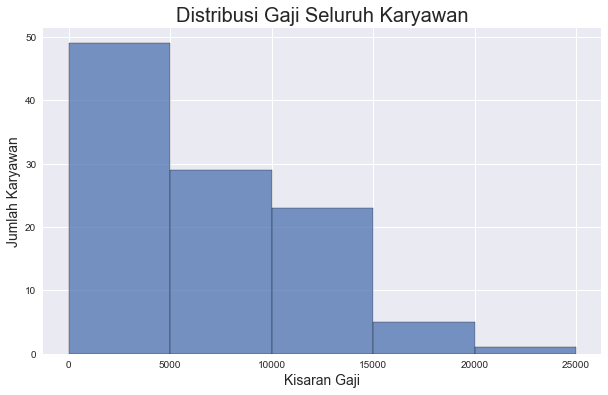

In [36]:
plt.figure(figsize=(10,6))

bin=[0, 5000, 10000, 15000, 20000, 25000]
sns.histplot(data=table_main, x='total_salary', bins=bin)

plt.title('Distribusi Gaji Seluruh Karyawan', size=20)
plt.xlabel('Kisaran Gaji', size=14)
plt.ylabel('Jumlah Karyawan', size=14)

plt.show()

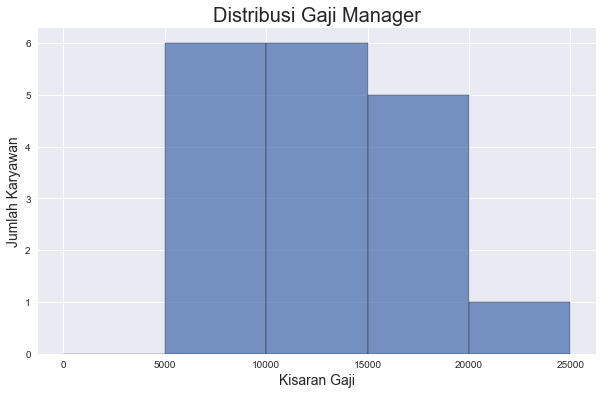

In [37]:
plt.figure(figsize=(10,6))

bin=[0, 5000, 10000, 15000, 20000, 25000]
sns.histplot(data=table_main[table_main['is_manager']=='Yes'], x='total_salary', bins=bin)

plt.title('Distribusi Gaji Manager', size=20)
plt.xlabel('Kisaran Gaji', size=14)
plt.ylabel('Jumlah Karyawan', size=14)

plt.show()

In [38]:
table_main.describe().loc['75%']

subordinates          0.00
salary             8900.00
commission_pct        0.15
total_salary      10200.00
Name: 75%, dtype: float64

Pertama, kita dapat melihat bagaimana persebaran gaji dari seluruh karyawan, dan kita tentukan **10000$** (kita asumsikan gaji menggunakan mata uang dollar) sebagai batas yang cukup baik untuk memisahkan gaji rendah dan tinggi karena sudah mewakili kurang lebih 75% dari persebaran data (diambil dari Q3).

Pada tabel pertama, kita dapat melihat bahwa dari hampir 80 karyawan yang memiliki gaji di bawah 10000$, masih tetap lebih banyak karyawan, sekitar 50, yang batas gaji nya hanya mencapai $5000.

Selebihnya dapat kita telaah dari tabel kedua, dimana terdapat 16 karyawan dengan posisi manager yang memiliki gaji di atas 10000$. Hal ini tentunya wajar karena manager memiliki posisi yang lebih tinggi. Sekitar 10 karyawan dengan posisi non-manager juga memiliki gaji yang cukup tinggi.

<br>**Insight:**<br>
Melihat hal ini, ternyata kita masih dapat menambah karyawan dengan gaji yang relatif rendah (tentunya perlu ditelaah lagi dari departement/title mana yang sesuai), dan kita tidak perlu menambah terlalu banyak manager karena perlu digaji cukup besar.

## **5 Departemen dengan Gaji Maksimum Terendah**

In [39]:
table_dept_top5low_maxsal = table_dept.groupby('department_name').min().sort_values('max_salary', ascending=True)[['job_title','min_salary','max_salary']].head().reset_index()
table_dept_top5low_maxsal

,department_name,job_title,min_salary,max_salary
0,Shipping,Shipping Clerk,2000,5000
1,Purchasing,Purchasing Clerk,2500,5500
2,Administration,Administration Assistant,3000,6000
3,Accounting,Accounting Manager,4200,9000
4,Finance,Accountant,4200,9000


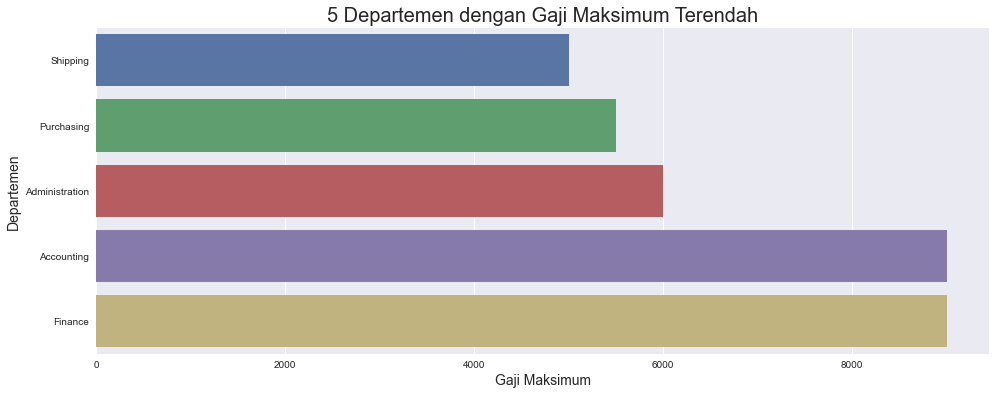

In [40]:
plt.figure(figsize=(16,6))

sns.barplot(data=table_dept_top5low_maxsal, x='max_salary', y='department_name')

plt.title('5 Departemen dengan Gaji Maksimum Terendah', size=20)
plt.xlabel('Gaji Maksimum', size=14)
plt.ylabel('Departemen', size=14)

plt.show()

In [41]:
table_main.groupby('department_name').count()['employee_id']

department_name
Accounting           2
Administration       1
Executive            3
Finance              6
Human Resources      1
IT                   5
Marketing            2
Public Relations     1
Purchasing           6
Sales               35
Shipping            45
Name: employee_id, dtype: int64

Tabel di atas memperlihatkan 5 departemen dengan gaji maksimum terendah, yaitu **Shipping (45 orang), Purchasing (6 orang), Administration (1 orang), Accounting (2 orang), dan Finance (6 orang)**.

Kita juga telah melihat dari analisis pertama bahwa kurang lebih 50 karyawan mendapat gaji di bawah 5000$, dan dapat kita simpulkan dari data tersedia bahwa mayoritas dari ke 50 karyawan tersebut berasal dari departemen Shipping.

<br>**Insight:**<br>
Penambahan tim pada departemen Shipping, Purchasing, dan Administration tidak berpengaruh signifikan terhadap budget yang diperlukan pada saat memperluas tim.

## **Korelasi antara Besar Komisi (%) dengan Total Salary di Departemen Sales**

In [42]:
table_sales = table_main[table_main['department_name']=='Sales']
table_sales.shape

(35, 14)

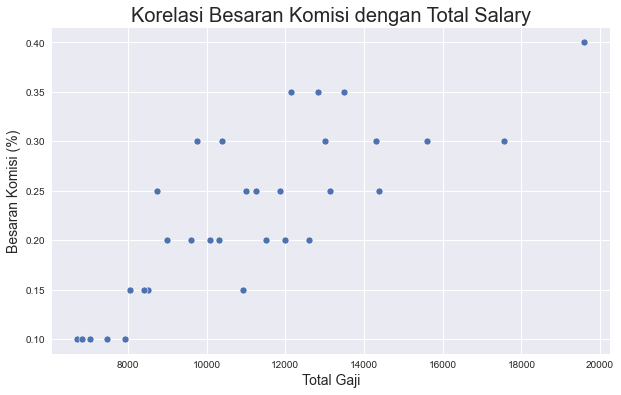

In [43]:
plt.figure(figsize=(10,6))

sns.scatterplot(data=table_sales, x='total_salary', y='commission_pct')

plt.title('Korelasi Besaran Komisi dengan Total Salary', size=20)
plt.xlabel('Total Gaji', size=14)
plt.ylabel('Besaran Komisi (%)', size=14)

plt.show()

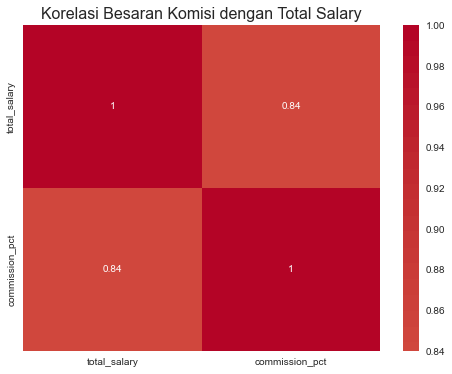

In [44]:
plt.figure(figsize=(8,6))

corr_matrix = table_sales[['total_salary','commission_pct']].corr(method='spearman')
sns.heatmap(data=corr_matrix, center=0, cmap='coolwarm', annot=True)

plt.title('Korelasi Besaran Komisi dengan Total Salary', size=16)

plt.show()

Kita telah mengetahui dari data processing bawha hanya departemen **'Sales'** yang mendapat komisi, dan departemen ini terdiri dari 35 karyawan, mewakili kurang lebih 30% dari seluruh karyawan.

Terlihat cukup jelas dari kedua tabel, bahwa semakin besar % komisi yang diberikan kepada karyawan, semakin besar juga total salary yang mereka terima. Tidak sedikit juga karyawan di departemen ini yang mendapat gaji lebih besar dari 10000$.

<br>**Insight:**<br>
Kita dapat asumsikan bahwa melihat banyaknya karyawan dalam departemen ini, maka departemen ini menjadi cukup penting dan mungkin dapat membawa keuntungan yang besar bagi company. Namun, jika ingin memperluas tim ini, maka perlu dipertimbangkan dengan baik komisi yang diberikan, karena berkaitan erat dengan gaji yang diberikan.

## **Rata-Rata Gaji Seluruh Karyawan Berdasarkan Negara**

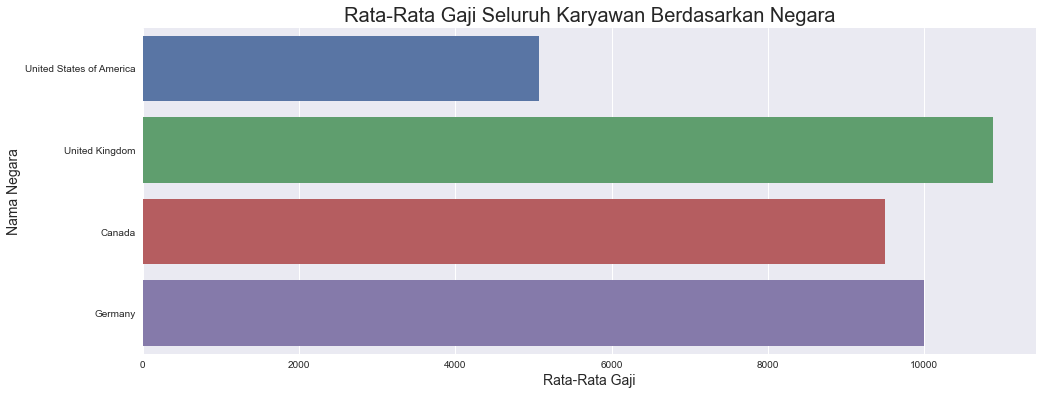

In [45]:
plt.figure(figsize=(16,6))

sns.barplot(data=table_main, x='total_salary', y='country_name', ci=0, estimator=np.mean)

plt.title('Rata-Rata Gaji Seluruh Karyawan Berdasarkan Negara', size=20)
plt.xlabel('Rata-Rata Gaji', size=14)
plt.ylabel('Nama Negara', size=14)

plt.show()

In [46]:
# Rata-rata Gaji Seluruh Karyawan Berdasarkan Kota
# plt.figure(figsize=(16,6))

# sns.barplot(data=table_main, x='total_salary', y='city', ci=0, estimator=np.mean)

# plt.title('Rata-Rata Gaji Seluruh Karyawan Berdasarkan Kota', size=20)
# plt.xlabel('Rata-Rata Gaji', size=14)
# plt.ylabel('Nama Kota', size=14)

# plt.show()

In [47]:
table_main[table_main['country_name']=='United States of America'].groupby('department_name').count()['employee_id']

department_name
Accounting         2
Administration     1
Executive          3
Finance            6
IT                 5
Purchasing         6
Shipping          45
Name: employee_id, dtype: int64

In [48]:
table_main[table_main['country_name']=='United Kingdom'].groupby('department_name').count()['employee_id']

department_name
Human Resources     1
Sales              35
Name: employee_id, dtype: int64

Hal yang paling menarik dari tabel di atasa adalah **United States of America (USA)** memiliki jumlah karyawan terbanyak, yaitu 68 orang (sekitar 60%), bahkan 3 karyawan dengan jabatan tertinggi berada di negara yang sama, namun rata-rata gaji nya justru **paling rendah**. Selain itu, kita dapat melihat bahwa rata-rata gaji **tertinggi** berasal dari negara **United Kingdom (UK)** yang terdiri dari 36 orang (sekitar 30%).

Setelah ditelaah lebih detil, ternyata mayoritas karyawan di USA berasal dari departemen dengan gaji terendah, sedangkan mayoritas karyawan di UK berada di departemen 'Sales', dimana dapat kita lihat di grafik-grafik sebelumnya bahwa departemen ini memiliki salary yang cukup besar.

<br>**Insight:**<br>
Meskipun secara data kita dapat melihat bahwa lebih baik memperluas tim di USA karena gaji yang relatif rendah, namun sehubungan dengan tiap departemen hanya berada di 1 area (sehingga tidak ada pembanding), maka perlu dipertimbangkan juga apakah standar gaji dapat berubah apabila departemen-departemen tersebut ditempatkan di negara lain.

## **Korelasi Banyaknya Bawahan Manager dengan Gaji Manager**

In [49]:
table_manager = table_main[table_main['is_manager']=='Yes'][['employee_id','department_name','total_salary','is_manager','subordinates']]
table_manager.shape

(18, 5)

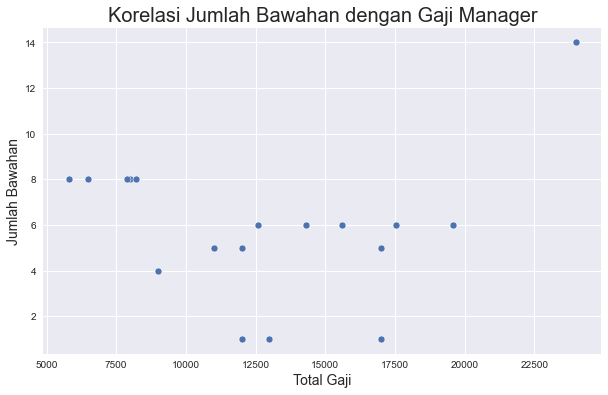

In [50]:
plt.figure(figsize=(10,6))

sns.scatterplot(data=table_manager, x='total_salary', y='subordinates')

plt.title('Korelasi Jumlah Bawahan dengan Gaji Manager', size=20)
plt.xlabel('Total Gaji', size=14)
plt.ylabel('Jumlah Bawahan', size=14)

plt.show()

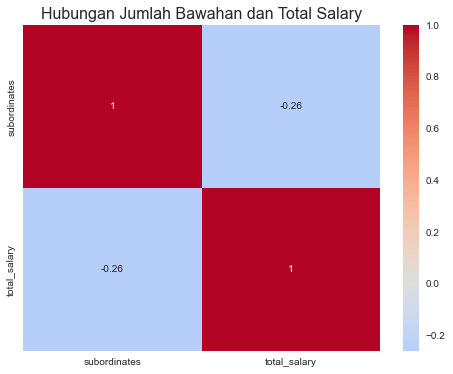

In [56]:
plt.figure(figsize=(8,6))

corr_matrix = table_manager[['subordinates','total_salary']].corr(method='spearman')
sns.heatmap(data=corr_matrix, center=0, cmap='coolwarm', annot=True)

plt.title('Hubungan Jumlah Bawahan dan Total Salary', size=16)

plt.show()

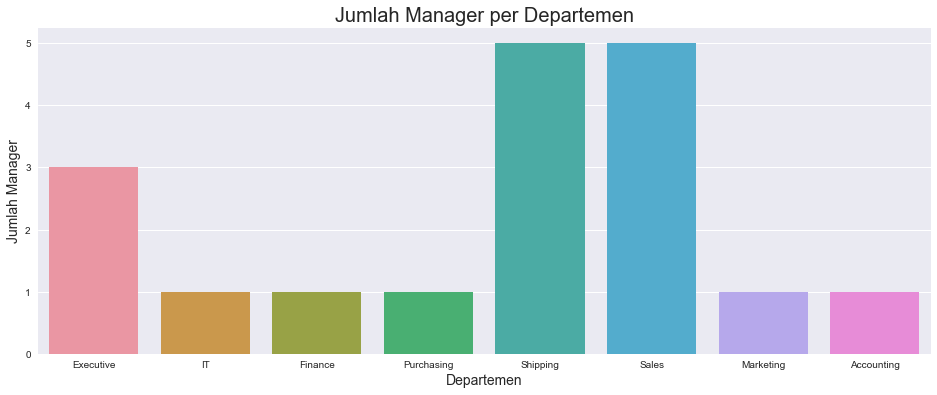

In [52]:
plt.figure(figsize=(16,6))

sns.countplot(data=table_manager, x='department_name')

plt.title('Jumlah Manager per Departemen', size=20)
plt.xlabel('Departemen', size=14)
plt.ylabel('Jumlah Manager', size=14)

plt.show()

Terdapat 18 manager yang bekerja di perusahaan pada saat ini, dan kita dapat katakan dari tabel-tabel di atas bahwa tidak ada korelasi yang kuat antara banyaknya bawahan dari seorang manager dengan gaji yang mereka terima.

Hanya ada satu karyawan yang memiliki gaji besar dengan jumlah bawahan banyak, dan karyawan tersebut adalah pemimpin perusahaan itu sendiri.

Selain itu, departemen Shipping dan Sales ternyata memiliki jumlah manager terbanyak, dikarenakan mereka juga memiliki tim paling besar. Untuk departemen Executive, mereka memang adalah kumpulan manager sehingga total tim sama dengan total manager. Hal ini merpelihatkan bahwa jumlah manager cukup seimbang dengan jumlah timnya.

<br>**Insight:**<br>
Selama para manager masih dapat menghandle dengan baik karyawan di bawahnya, maka kita juga masih dapat memperluas tim dengan budget yang cukup rendah, karena jumlah bawahan tidak menyebabkan kenaikan gaji para manager.

# **STATISTICS**

## **Perbedaan Gaji Tiap Departemen**

Selain menggunakan visualisasi berupa tabel, kita juga dapat menggunakan statistik untuk memperlihatkan suatu kondisi, dan untuk kali ini kita akan melihat apakah ada perbedaan mean/median gaji tiap departemen.

Pada data processing, sebenernya kita sudah mengetahui bahwa kolom ```total_salary``` tidak terdistribusi normal menggunakan IQR, namun kita akan kembali mengujinya dengan menggunakan **metode shapiro**.

In [53]:
# Uji Normalitas total_salary

from scipy.stats import shapiro

norm, pval = shapiro(table_main['total_salary'])

if pval < 0.05 :
    print (f'Tolak H0 Karena P-Value ({pval} < 0.05)')
    print ('Data total_salary tidak terdistribusi normal')
else :
    print (f'Gagal Tolak H0 Karena P-Value ({pval} > 0.05)')
    print ('Data total_salary terdistribusi normal')

Tolak H0 Karena P-Value (1.4295886785475886e-07 < 0.05)
Data total_salary tidak terdistribusi normal


Ternyata, dengan menggunakan metode shapiro pun kolom ```total_salary``` terbukti tidak terdistribusi dengan normal.

Maka, kita akan menguji median dari gaji, karena mean sensitif terhadap outlier.

In [54]:
# Uji Perbandingan Nilai total_salary Antar Setiap Departemen (Kruskal Wallis)

from scipy.stats import kruskal

krus, pvalkrus = kruskal(
    table_main[table_main['department_name'] == 'Accounting']['total_salary'],
    table_main[table_main['department_name'] == 'Administration']['total_salary'],
    table_main[table_main['department_name'] == 'Executive']['total_salary'],
    table_main[table_main['department_name'] == 'Finance']['total_salary'],
    table_main[table_main['department_name'] == 'Human Resources']['total_salary'],
    table_main[table_main['department_name'] == 'IT']['total_salary'],
    table_main[table_main['department_name'] == 'Marketing']['total_salary'],
    table_main[table_main['department_name'] == 'Public Relations']['total_salary'],
    table_main[table_main['department_name'] == 'Purchasing']['total_salary'],
    table_main[table_main['department_name'] == 'Sales']['total_salary'],
    table_main[table_main['department_name'] == 'Shipping']['total_salary']
) 

if pvalkrus < 0.05 :
    print (f'Tolak H0 Karena P-Value ({pvalkrus} < 0.05)')
    print ('Terdapat Perbedaan Nilai Median Total Salary pada Setiap Departemen Yang Ada')
else :
    print (f'Gagal Tolak H0 Karena P-Value ({pvalkrus} > 0.05)')
    print ('Tidak Terdapat Perbedaan Nilai Median Total Salary pada Setiap Departemen Yang Ada')

Tolak H0 Karena P-Value (1.6709957578824668e-12 < 0.05)
Terdapat Perbedaan Nilai Median Total Salary pada Setiap Departemen Yang Ada


<br>**Insight:**<br>
Uji statistik ini membantu membuktikan bahwa memang terdapat perbedaan median gaji antar departemen, sehingga ketika kita ingin memperluas tim, kita perlu telaah lebih dahulu timnya.

Kita pun bisa melihat lebih detil dengan menampilkan tabel di bawah.

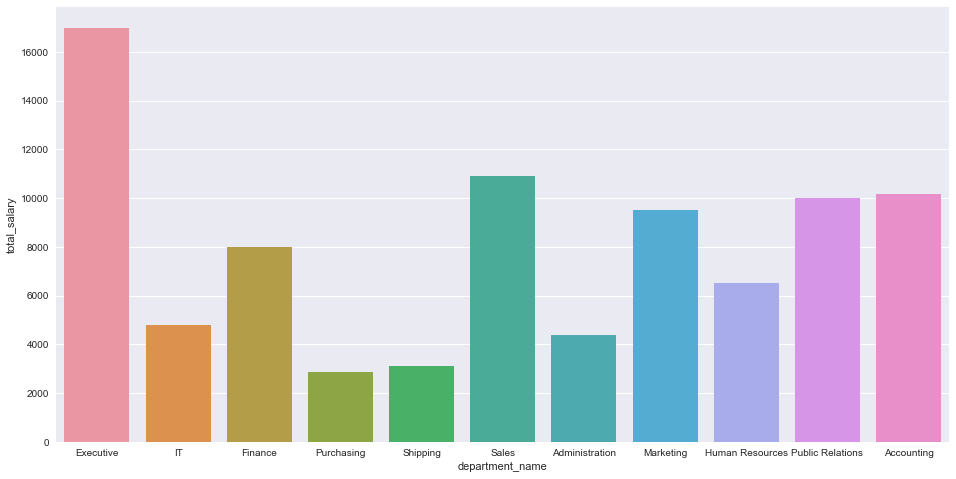

In [55]:
plt.figure(figsize=(16,8))
sns.barplot(data=table_main, x='department_name', y='total_salary', ci=0, estimator=np.median)
plt.show()